## Ridge Regression

In This Notebook, We Will Build A Ridge Regression Model To Predict The Package Based On CGPA

1. **Data Exploration And Understanding**
   * Load And Inspect The Dataset.
   * Examine The Relationship Between **CGPA** And **Package**.
   * Check For Multicollinearity And Feature Scaling Needs (Important For Ridge Regression).
2. **Model Training**
   * Apply Feature Scaling (Standardization) To The Predictor(S).
   * Train The **Ridge Regression** Model Using The Data.
   * Tune The Regularization Parameter (**Alpha**) To Control Overfitting.
3. **Residual Analysis**
   * Analyze The Residuals To Check Model Assumptions And Quality of Fit.
   * Compare Residuals With Those From A Simple Linear Regression To See The Effect of Regularization.
4. **Prediction And Model Evaluation**
   * Make Predictions On The Test Set.
   * Evaluate Model Performance Using Appropriate Metrics Such As **RMSE**, **$R^2$**, And **MAE**.
   * Analyze How Regularization Impacts Prediction And Reduces Overfitting.

Step 0: Importing Libraries

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import r2_score
from colorama import Fore, Style

Step 1: Importing Data

In [115]:
data = pd.read_csv("../../Data/Simple-Linear-Regression.csv")
data.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [116]:
print(f"{Fore.GREEN}Shape:{Style.RESET_ALL} {data.shape}")

Shape: (200, 2)


In [117]:
print(Fore.GREEN + "Info:")
print(Style.RESET_ALL)
print(data.info())

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB
None


In [118]:
print(Fore.GREEN + "Missing Values In The Data:")
print(Style.RESET_ALL)
print(data.isnull().sum())

Missing Values In The Data:

cgpa       0
package    0
dtype: int64


Step 2: Statistical Summary of The Data

In [119]:
data.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


Step 3: Plot

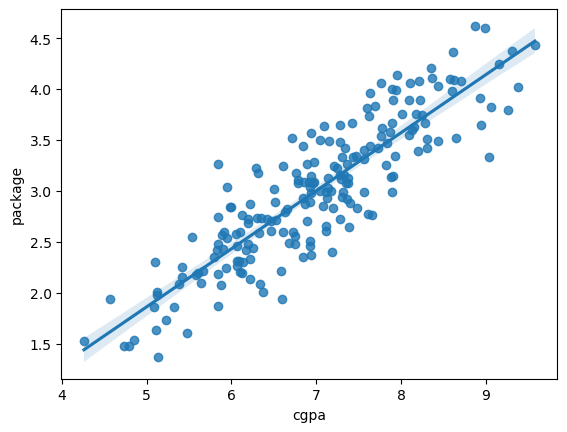

In [120]:
sns.regplot(x = data['cgpa'], y = data['package'])
plt.show()

Step 4: Splitting Data

In [121]:
X = data['cgpa']
y = data['package']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [122]:
print(f"{Fore.GREEN}The Shape of X_train Is:{Style.RESET_ALL} {X_train.shape}")
print(f"{Fore.GREEN}The Shape of X_test Is:{Style.RESET_ALL} {X_test.shape}")
print(f"{Fore.GREEN}The Shape of y_train Is:{Style.RESET_ALL} {y_train.shape}")
print(f"{Fore.GREEN}The Shape of y_test Is:{Style.RESET_ALL} {y_test.shape}")

The Shape of X_train Is: (140,)
The Shape of X_test Is: (60,)
The Shape of y_train Is: (140,)
The Shape of y_test Is: (60,)


In [123]:
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

Step 5: Training The Simple Linear Regression Model

Finding The Optimal Alpha For Ridge Regression

In [124]:
alphas = [0.01, 0.1, 1, 10, 100, 200, 500]
ridgeCV = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)
ridgeCV.fit(X_train_reshaped, y_train)
print("Best Alpha:", ridgeCV.alpha_)

Best Alpha: 1.0


In [125]:
model = Ridge(alpha=ridgeCV.alpha_)
model.fit(X_train_reshaped, y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",np.float64(1.0)
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradi

In [126]:
print(Fore.GREEN + f'Coefficient: {Style.RESET_ALL}{round(model.coef_[0], 2)}')
print(Fore.GREEN + f'Intercept: {Style.RESET_ALL}{round(model.intercept_, 2)}')


Coefficient: 0.58
Intercept: -1.05


Step 6: Making Prediction

In [127]:
y_train_pred = model.predict(X_train_reshaped)

Plotting The Model

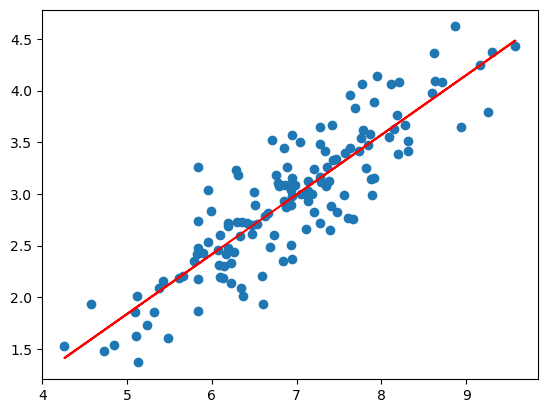

In [128]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, color = 'r')
plt.show()

Step 7: Residual Analysis

In [129]:
res = y_train - y_train_pred

C:\Users\ASUS\AppData\Local\Temp\ipykernel_828\528445446.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


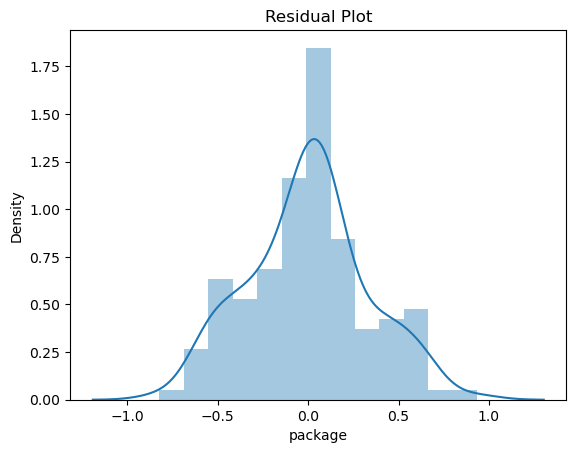

In [130]:
sns.distplot(res)
plt.title('Residual Plot')
plt.show()

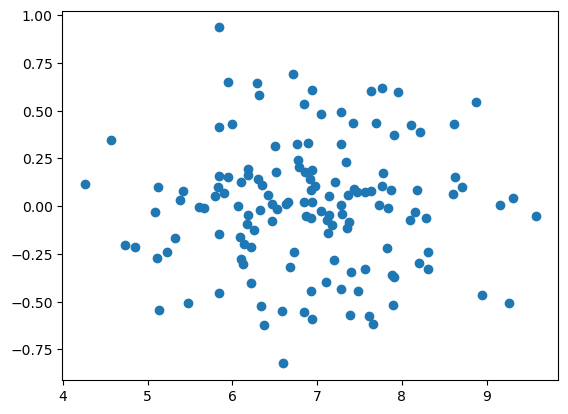

In [131]:
plt.scatter(X_train, res)
plt.show()

Step 8: Predictions And Evaluation On Test Set

In [132]:
y_test_pred = model.predict(X_test_reshaped)

In [133]:
print(Fore.GREEN + f'R-Squared For The Training Set: {Style.RESET_ALL}{round(r2_score(y_true = y_train, y_pred = y_train_pred), 2)}')
print(Fore.GREEN + f'R-Squared For The Test Set: {Style.RESET_ALL}{round(r2_score(y_true = y_test, y_pred = y_test_pred), 2)}')

R-Squared For The Training Set: 0.77
R-Squared For The Test Set: 0.78


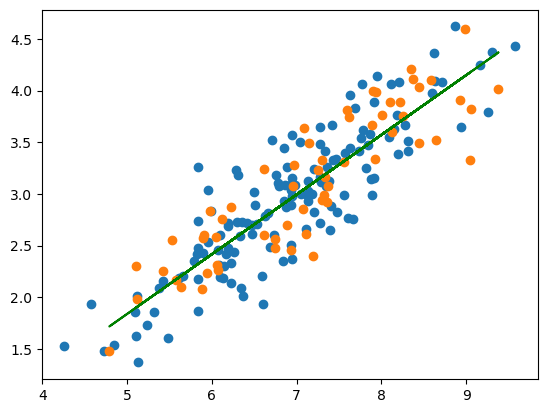

In [134]:
# Plotting The Model With The Test Set
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, color = 'g')
plt.show()